# WatChMaL: Time Experiments
### Iñaki Erregue Álvarez-Buhilla

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from utils.utils import *

# 1 - Time as a channel

In [3]:
base_path = './data/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'/IWCD_mPMT_Short_2_class_idxs_xps.npz')

In [4]:
data_splitting(split_idxs)

Total num. of events:  2950284
Events for testing: 10.004
Events for validation: 2.399
Events for training: 87.596


In [5]:
t_channel_modes = ['Q+T', 'Q', 'Qu', 'Qu+Tu', 'T', 'Qs', 'Qs+Ts', 'Q+Ts', 'Quo', 'Qs+T'] 

In [6]:
results = []
for mode in t_channel_modes:
    results.append(basic_metrics(base_path, labels,mode))

In [7]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['charge'] = np.where(df['model'].str.contains('Q'), 1, 0)
df['time'] = np.where(df['model'].str.contains('T'), 1, 0)
df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)
df['collapsed'] = np.where(df['model'].str.contains('s'), 1, 0)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model','charge', 'time', 'scaled', 'collapsed', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(t_channel_modes))

,model,charge,time,scaled,collapsed,log_loss,acc,f1,auc,opt_threshold,total_score
0,Quo,1,0,0,0,0.5940,0.6747,0.6579,0.7434,0.4833,1.4820
1,Q+Ts,1,1,1,1,0.6047,0.6696,0.6613,0.7327,0.4960,1.4590
2,Qs+Ts,1,1,1,1,0.6046,0.6712,0.6542,0.7337,0.4879,1.4546
3,Q+T,1,1,1,0,0.6105,0.6638,0.6488,0.7249,0.5029,1.4270
4,Qs+T,1,1,1,1,0.6133,0.6617,0.6422,0.7215,0.4828,1.4122
5,T,0,1,1,0,0.6304,0.6428,0.6308,0.6962,0.5042,1.3394
6,Qu,1,0,0,0,0.6271,0.6427,0.6203,0.7007,0.4866,1.3367
7,Q,1,0,1,0,0.6358,0.6313,0.6142,0.6862,0.4870,1.2959
8,Qs,1,0,1,1,0.6466,0.6186,0.6006,0.6680,0.4923,1.2406
9,Qu+Tu,1,1,0,0,0.6646,0.5906,0.5801,0.6295,0.5076,1.1355


In [4]:
models_to_roc = ['Quo', 'Q+Ts', 'Qs+Ts', 'Q+T', 'Qs+T', 'Qu']

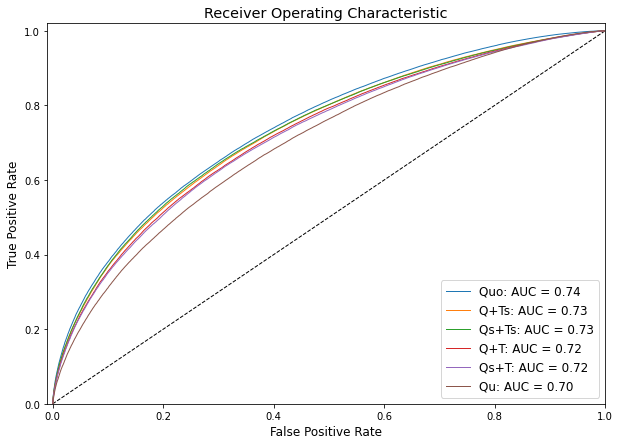

In [9]:
draw_roc_curve(base_path, labels, models_to_roc)

Found training logs:  ['./data/Q+T/log_train_0.csv']


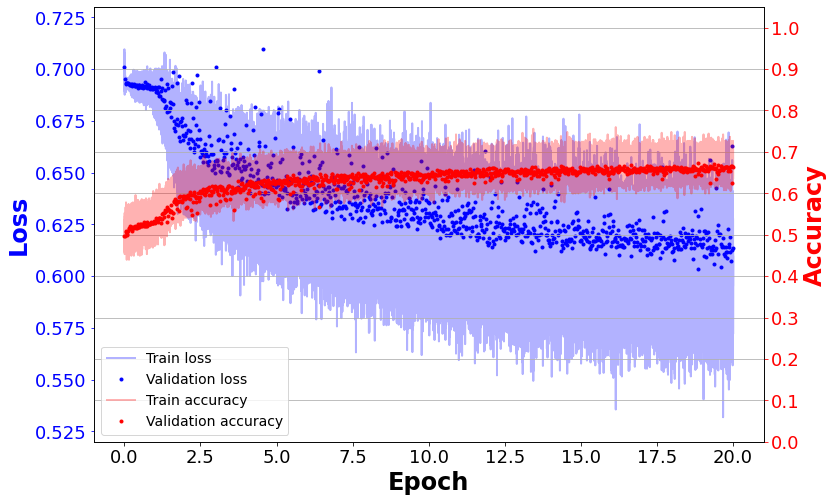

In [10]:
disp_learn_hist(base_path+'Q+T', losslims=(0.52, 0.73))

In [7]:
sf = []
mlabels = []

for mode in models_to_roc:
    sf.append(np.load(base_path+mode+'/softmax.npy'))
    mlabels.append(labels)
    
label_dict = {'gamma':0, 'electron':1}

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]
[<AxesSubplot:title={'center':'Electron vs Gamma Rejection'}, xlabel='Electron Signal Efficiency', ylabel='Gamma Background Rejection'>]


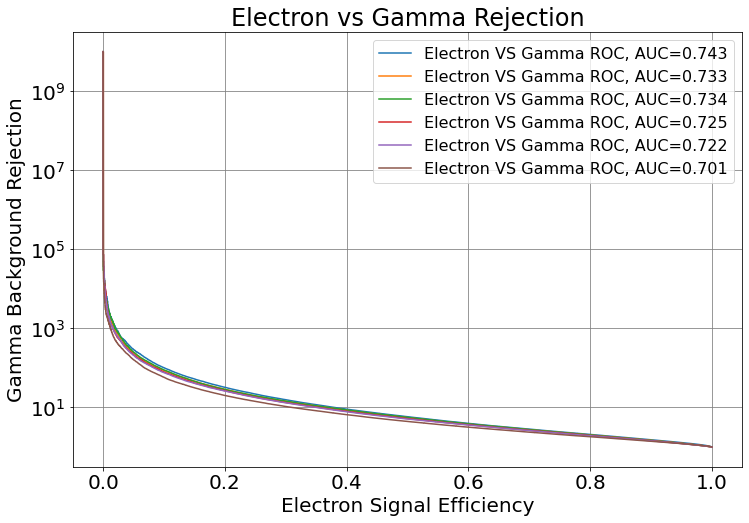

In [10]:
fprs, tprs, thrs = multi_compute_roc(sf, mlabels, 1, 0)
multi_plot_roc(fprs, tprs, thrs, 'Electron', 'Gamma', fig_list=[1], show=True)

# 2 - Time to order charge channels

In [11]:
t_order_mode = ['Qtu', 'Qt', 'Qu', 'Quo', 'Qu_tnorm']

In [12]:
results = []
for mode in t_order_mode:
    results.append(basic_metrics(base_path, labels, mode))

In [13]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model', 'scaled', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(t_order_mode))

,model,scaled,log_loss,acc,f1,auc,opt_threshold,total_score
0,Quo,0,0.5940,0.6747,0.6579,0.7434,0.4833,1.4820
1,Qu_tnorm,0,0.6272,0.6424,0.6320,0.7002,0.5019,1.3475
2,Qu,0,0.6271,0.6427,0.6203,0.7007,0.4866,1.3367
3,Qt,1,0.6358,0.6362,0.6372,0.6902,0.5190,1.3279
4,Qtu,0,0.6463,0.6192,0.6043,0.6679,0.5012,1.2451


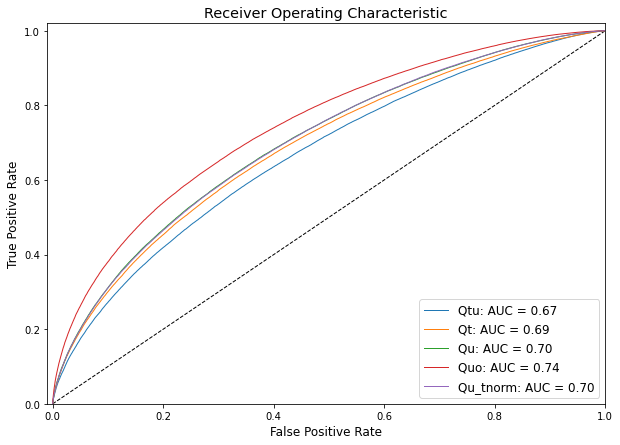

In [14]:
draw_roc_curve(base_path, labels, t_order_mode)

Found training logs:  ['./data/Qt/log_train_0.csv']


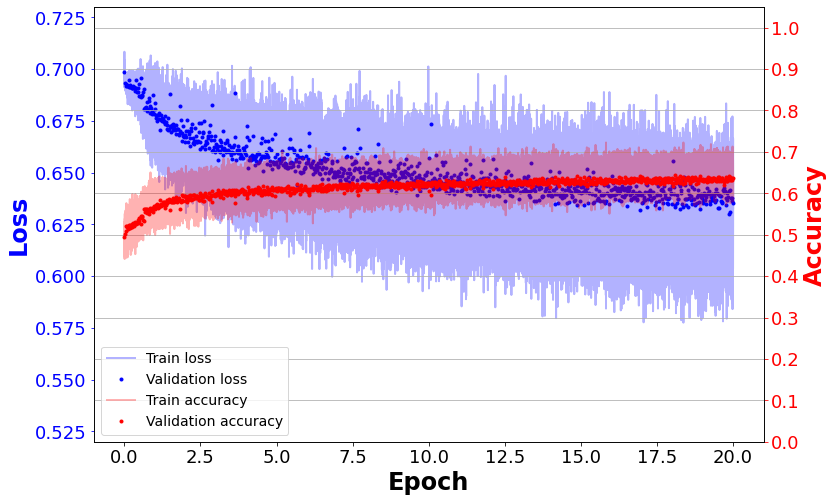

In [15]:
disp_learn_hist(base_path+'Qt', losslims=(0.52, 0.73))

# 3 - Cedar XPs

In [16]:
base_path = '/Users/mariateresaalvarez-buhillapuig/Desktop/cedar/'

labels = np.load(base_path+'/labels.npy')
test_idxs = np.load(base_path+'/indices.npy')
split_idxs = np.load(base_path+'IWCD_mPMT_Short_2_class_eg_9M_idxs.npz')

In [17]:
data_splitting(split_idxs)

Total num. of events:  17702123
Events for testing: 13.334
Events for validation: 3.333
Events for training: 83.334


In [18]:
modes = ['Qu'] 

In [19]:
results = []
for mode in modes:
    results.append(basic_metrics(base_path, labels,mode))

In [20]:
pd.set_option("display.precision", 4)
df = pd.DataFrame(results)

df['charge'] = np.where(df['model'].str.contains('Q'), 1, 0)
df['time'] = np.where(df['model'].str.contains('T'), 1, 0)
df['scaled'] = np.where(df['model'].str.contains('u'), 0, 1)
df['collapsed'] = np.where(df['model'].str.contains('s'), 1, 0)

df['total_score'] = df.acc+df.f1+df.auc-df.log_loss

df.sort_values(by='total_score', inplace=True, ascending=False)
df = df[['model','charge', 'time', 'scaled', 'collapsed', 'log_loss', 'acc', 'f1', 'auc', 'opt_threshold', 'total_score']].reset_index(drop=True)

df.head(len(t_channel_modes))

,model,charge,time,scaled,collapsed,log_loss,acc,f1,auc,opt_threshold,total_score
0,Qu,1,0,0,0,0.595,0.6745,0.6577,0.7421,0.4851,1.4792


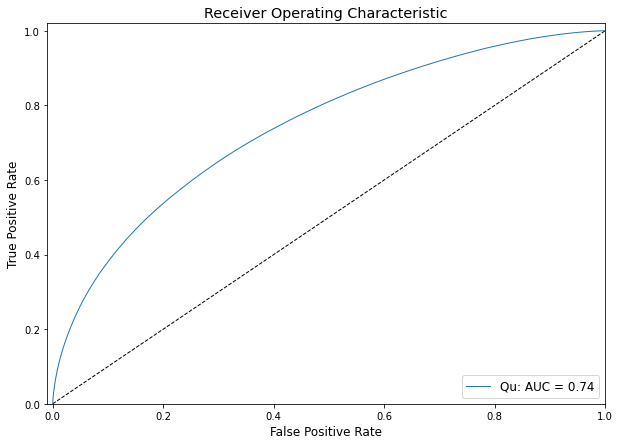

In [21]:
draw_roc_curve(base_path, labels, modes)

In [22]:
#disp_learn_hist(base_path+'Qu', losslims=(0.52, 0.73))

{'Gamma': 0, 'Electron': 1}
{'Gamma': 0, 'Electron': 1}


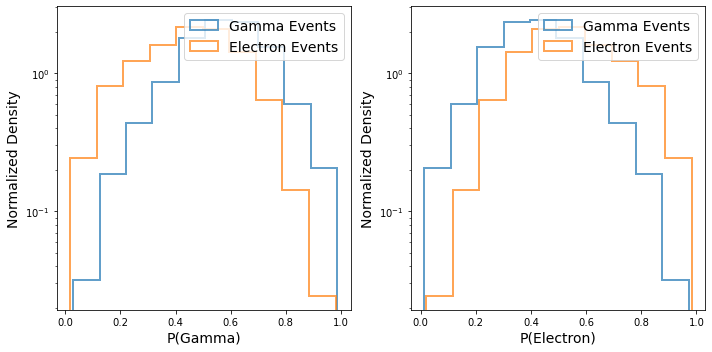

In [11]:
softmax = np.load(base_path+'/Qu/softmax.npy')
label_dict = {'Gamma':0, 'Electron':1}

# Plot classifier likelihoods over different classes for events of a given particle type
plot_classifier_response(softmax, labels, ['Gamma', 'Electron'], label_dict)

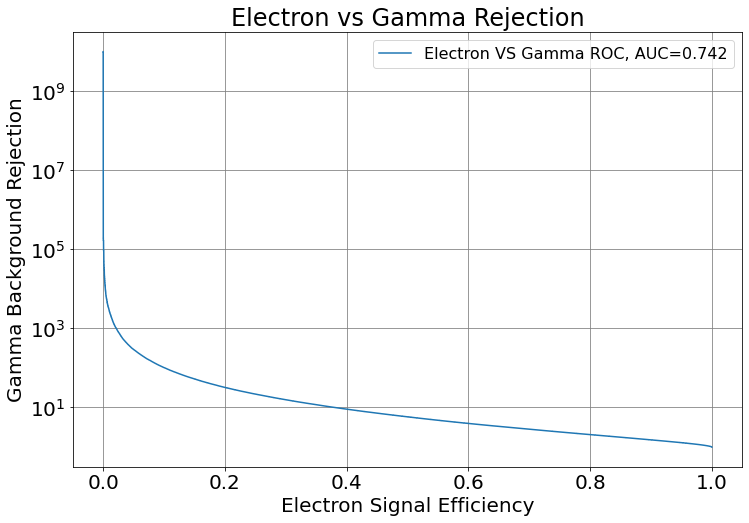

In [42]:
fpr, tpr, thr = compute_roc(softmax, labels, 1, 0)
plot_roc(fpr, tpr, thr, 'Electron', 'Gamma', fig_list=[1], show=True)